# System Newton Raphson

## Algorithm: Newton-Raphson Method for System of Nonlinear Equations

1. Define the system of nonlinear equations as a vector function:
   $$F(x) = \begin{bmatrix} f_1(x_1, x_2, ..., x_n) \\ f_2(x_1, x_2, ..., x_n) \\ \vdots \\ f_n(x_1, x_2, ..., x_n) \end{bmatrix}$$

2. Define the Jacobian matrix:
   $$J(x) = \begin{bmatrix} \frac{\partial f_1}{\partial x_1} & \frac{\partial f_1}{\partial x_2} & \cdots & \frac{\partial f_1}{\partial x_n} \\ \frac{\partial f_2}{\partial x_1} & \frac{\partial f_2}{\partial x_2} & \cdots & \frac{\partial f_2}{\partial x_n} \\ \vdots & \vdots & \ddots & \vdots \\ \frac{\partial f_n}{\partial x_1} & \frac{\partial f_n}{\partial x_2} & \cdots & \frac{\partial f_n}{\partial x_n} \end{bmatrix}$$

3. Choose an initial guess vector `x0`, tolerance `ε`, and maximum iterations.

4. Repeat until the correction vector `delta` is small:
   - Compute function vector `F(x0)`.
   - Compute Jacobian matrix `J(x0)`.
   - Solve the linear system:  
     $$J(x_0) \cdot \delta = -F(x_0)$$
   - Update approximation:  
     $$x_1 = x_0 + \delta$$

5. After the loop ends, approximate the root as `x1`.

6. Plot:
   - Contours of the equations (e.g., `f1(x,y)=0` and `f2(x,y)=0`).
   - Iteration points (`x0, x1, ...`) as markers.
   - Final root highlighted in green.


Approximate solution: [1.93185165 0.51763809]


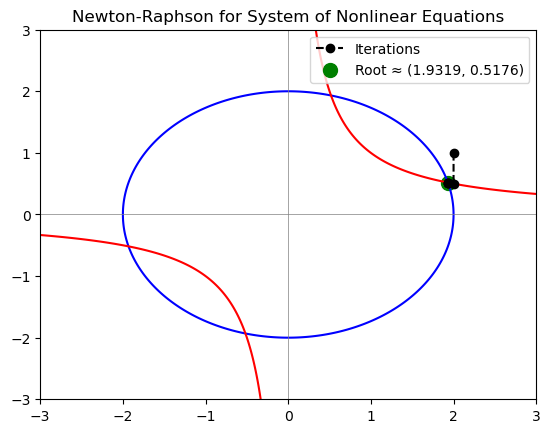

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Example system of equations:
# f1(x, y) = x^2 + y^2 - 4 = 0
# f2(x, y) = x*y - 1 = 0

def F(X):
    x, y = X
    return np.array([x**2 + y**2 - 4,  # Equation 1
                     x*y - 1])          # Equation 2

def J(X):
    x, y = X
    return np.array([[2*x, 2*y],        # df1/dx, df1/dy
                     [y, x]])           # df2/dx, df2/dy

def newton_system(F, J, x0, tol=1e-6, max_iter=100):
    roots = [x0]
    for _ in range(max_iter):
        Fx = F(x0)
        Jx = J(x0)
        delta = np.linalg.solve(Jx, -Fx)
        x1 = x0 + delta
        roots.append(x1)
        if np.linalg.norm(delta) < tol:
            return x1, roots
        x0 = x1
    return x0, roots

# Initial guess
x0 = np.array([2.0, 1.0])
root, roots = newton_system(F, J, x0)

print("Approximate solution:", root)

# Plotting (contours for visualization)
x = np.linspace(-3, 3, 400)
y = np.linspace(-3, 3, 400)
X, Y = np.meshgrid(x, y)

F1 = X**2 + Y**2 - 4
F2 = X*Y - 1

plt.contour(X, Y, F1, [0], colors='blue')
plt.contour(X, Y, F2, [0], colors='red')
plt.plot([r[0] for r in roots], [r[1] for r in roots], 'o--', color='black', label="Iterations")
plt.scatter(root[0], root[1], color='green', s=100, label=f"Root ≈ ({root[0]:.4f}, {root[1]:.4f})")
plt.axhline(0, color='gray', linewidth=0.5)
plt.axvline(0, color='gray', linewidth=0.5)
plt.legend()
plt.title("Newton-Raphson for System of Nonlinear Equations")
plt.show()
